In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [223]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/ZEEL.csv")

In [224]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ZEETELE,EQ,1092.55,1175.00,1179.95,1160.00,1179.95,1179.95,1177.03,1261391,1.484690e+14,NaN,NaN,NaN
1,2000-01-04,ZEETELE,EQ,1179.95,1220.00,1274.35,1183.10,1274.35,1260.65,1228.02,4616547,5.669220e+14,NaN,NaN,NaN
2,2000-01-05,ZEETELE,EQ,1260.65,1160.55,1317.70,1159.80,1190.95,1176.55,1238.35,8763127,1.085178e+15,NaN,NaN,NaN
3,2000-01-06,ZEETELE,EQ,1176.55,1195.00,1200.00,1095.00,1106.00,1115.45,1135.04,5164020,5.861353e+14,NaN,NaN,NaN
4,2000-01-07,ZEETELE,EQ,1115.45,1097.10,1097.10,1026.25,1026.25,1026.25,1029.94,755129,7.777374e+13,NaN,NaN,NaN


In [225]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4787 non-null   float64
 14  %Deliverble         4787 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [226]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.787000e+03,4787.000000
mean,273.404495,273.974746,279.588862,267.593969,273.184075,273.233566,273.627346,4.825422e+06,1.249096e+14,6.264571e+04,1.415718e+06,0.452211
std,176.403117,177.386116,181.264300,172.365778,176.006686,176.048287,176.843638,8.402019e+06,2.190916e+14,7.267494e+04,1.959727e+06,0.185907
min,62.300000,62.000000,66.300000,60.100000,62.700000,62.300000,63.080000,4.415000e+03,7.021150e+10,2.960000e+02,4.415000e+03,0.055700
25%,143.200000,144.000000,146.950000,140.000000,143.500000,143.200000,143.680000,1.218226e+06,2.594652e+13,2.457875e+04,5.136865e+05,0.307300
50%,238.200000,238.000000,244.000000,231.450000,237.675000,238.125000,238.895000,2.138807e+06,5.249890e+13,4.107400e+04,8.935320e+05,0.463500
75%,345.637500,345.975000,352.800000,338.400000,345.050000,345.587500,345.637500,4.532904e+06,1.136967e+14,7.146250e+04,1.593444e+06,0.593900
max,1541.700000,1640.000000,1645.000000,1512.250000,1564.000000,1541.700000,1578.110000,1.659597e+08,4.285622e+15,1.088460e+06,4.289143e+07,1.000000


In [227]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [228]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [229]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [230]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [231]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [232]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [233]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,3.241491,-2.203568,186.40,8542755,NaN
5302,3.292291,0.079787,188.15,14247767,NaN
5303,1.870657,0.158898,189.10,8429439,NaN
5304,3.037634,-2.227463,186.55,9483009,NaN
5305,3.974952,0.161900,185.60,11435285,NaN


In [234]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [235]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [236]:
#Define the prediction model
model = RandomForestRegressor()

In [237]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [238]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.8602100759156192


In [239]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [240]:
predictions = model.predict(X_Check)

In [241]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

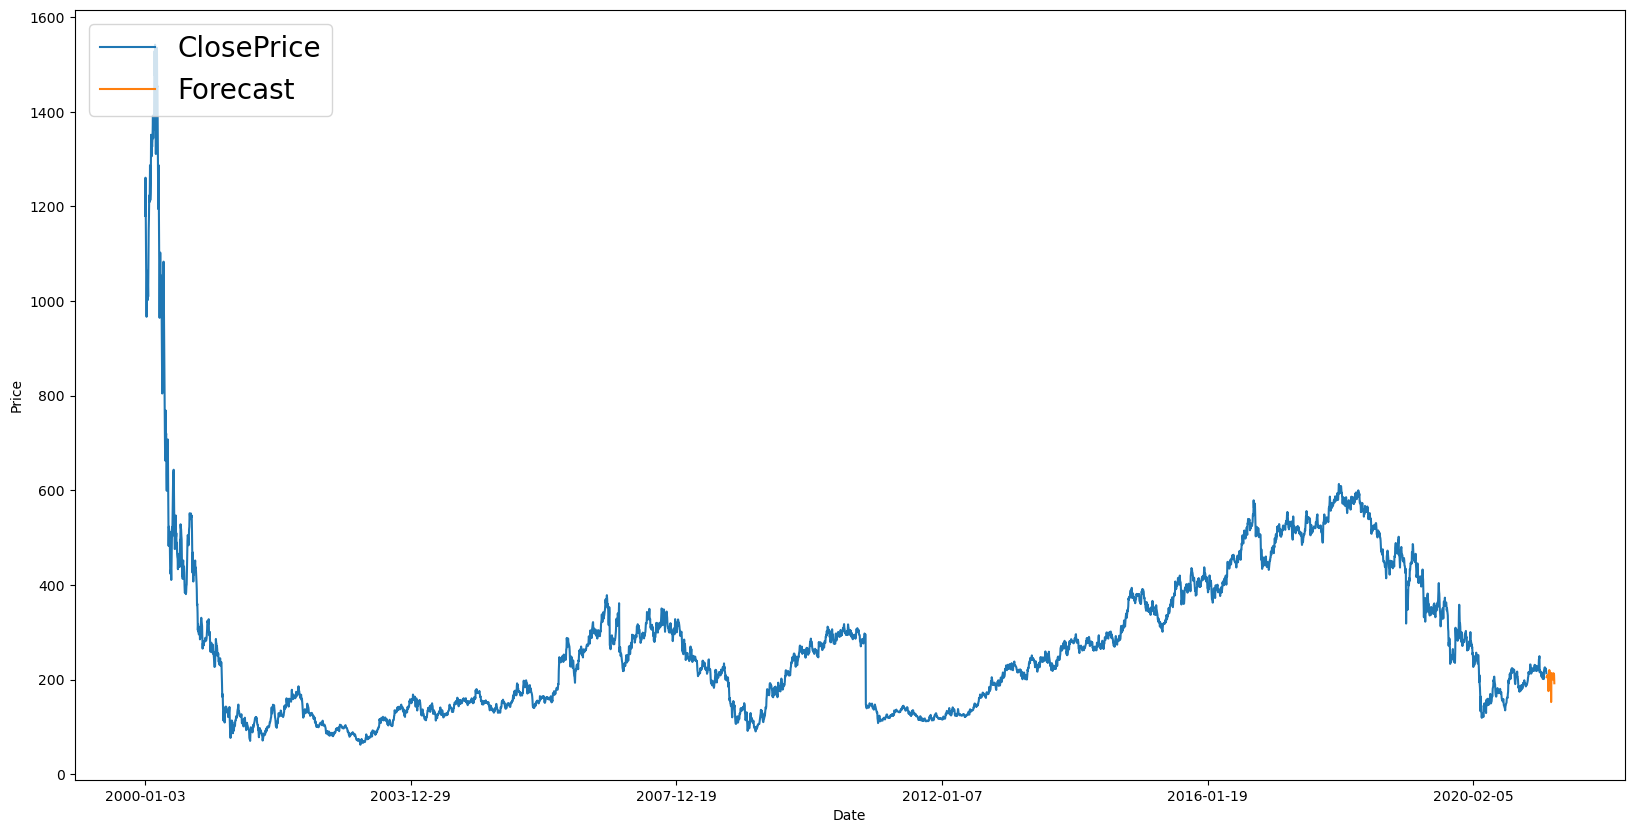

In [242]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')